In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

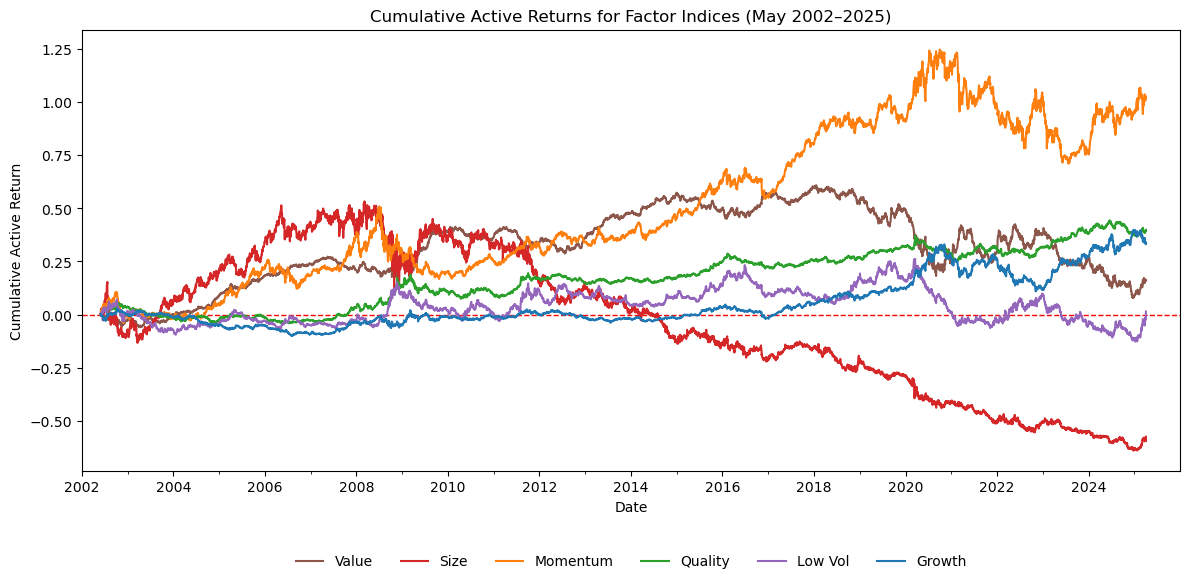

In [3]:

# 1) Load your data
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# 2) Compute daily excess returns vs. market
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
excess = df[factors].sub(df["mkt"], axis=0)

# 3) Compound to get cumulative active returns
cum_active = (1 + excess).cumprod() - 1

# 4) Labels & hex‐colours
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}
colors = {
    "iwf":  "#1f77b4",  # Growth (blue)
    "mtum": "#ff7f0e",  # Momentum (orange)
    "qual": "#2ca02c",  # Quality (green)
    "size": "#d62728",  # Size (red)
    "usmv": "#9467bd",  # Low Vol (purple)
    "vlue": "#8c564b",  # Value (brown)
}

# 5) Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(0, color="red", linestyle="--", linewidth=1)
for col in factors:
    ax.plot(
        cum_active.index, cum_active[col],
        label=labels[col], color=colors[col], linewidth=1.5
    )

# 6) # X-axis: major labels every 2 years, minor ticks every year
ax.set_xlim(pd.to_datetime("2002-01-01"), pd.to_datetime("2025-12-31"))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

# 7) One-row, full-width legend
ax.legend(
    ncol=len(factors),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.25),
    frameon=False
)

ax.set_title("Cumulative Active Returns for Factor Indices (May 2002–2025)")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Active Return")
plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

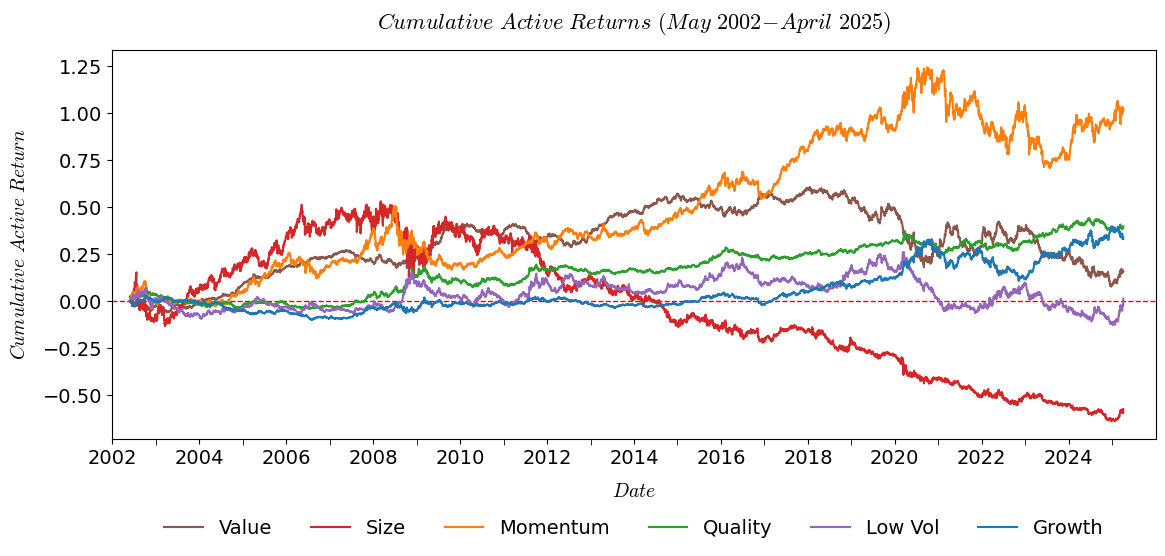

In [4]:
# ─── 0) Matplotlib serif + mathtext, disable external TeX, bump base font ─────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "font.size": 14,
    "mathtext.fontset": "cm",
    "text.usetex": False,      # ensure we use Matplotlib's math renderer
})

# ─── 1) Load your data ─────────────────────────────────────────────────────────
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# ─── 2) Compute daily excess returns vs. market & cumulative ────────────────
factors    = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
excess     = df[factors].sub(df["mkt"], axis=0)
cum_active = (1 + excess).cumprod() - 1

# ─── 3) Labels & exact hex-colours ──────────────────────────────────────────
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}
colors = {
    "iwf":  "#1f77b4",  # Growth (blue)
    "mtum": "#ff7f0e",  # Momentum (orange)
    "qual": "#2ca02c",  # Quality (green)
    "size": "#d62728",  # Size (red)
    "usmv": "#9467bd",  # Low Vol (purple)
    "vlue": "#8c564b",  # Value (brown)
}

# ─── 4) Plot lines + zero-line ──────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(0, color="red", linestyle="--", linewidth=1)

for col in factors:
    ax.plot(
        cum_active.index,
        cum_active[col],
        label=labels[col],
        color=colors[col],
        linewidth=1.5
    )

# ─── 5) X-axis: major tick every 2 yrs, minor tick every 1 yr ──────────────
ax.set_xlim(datetime(2002, 1, 1), datetime(2025, 12, 31))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis="x", which="minor", length=4)
ax.tick_params(axis="both", which="major", labelsize=14)

# ─── 6) Legend: one row, full width beneath ────────────────────────────────
ax.legend(
    ncol=len(factors),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.30),
    frameon=False,
    prop={"size": 14}
)

# ─── 7) Titles & labels with bold mathtext ─────────────────────────────────
ax.set_title(
    r"$Cumulative\ Active\ Returns\ (May\ 2002\!-\!April\ 2025)$",
    pad=15,
    size=16
)
ax.set_xlabel(r"$Date$", labelpad=10, size=14)
ax.set_ylabel(r"$Cumulative\ Active\ Return$", labelpad=10, size=14)

plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

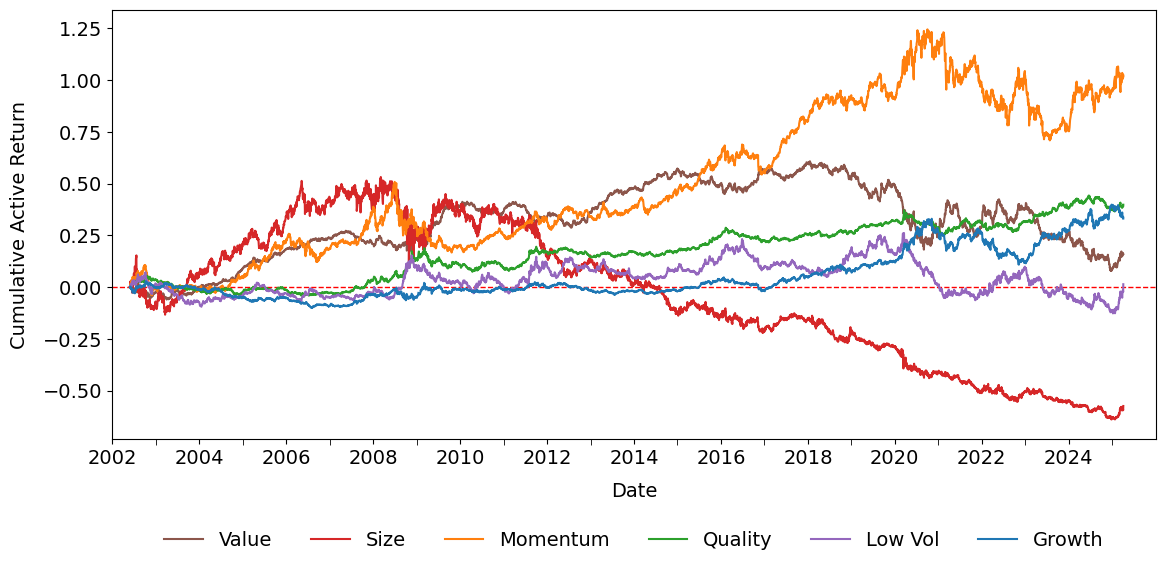

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import glob

# ─── 0) Set Matplotlib font and math rendering ─────────────────────────────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "font.size": 14,
    "mathtext.fontset": "cm",   # Classic math font
    "text.usetex": False,       # Use internal mathtext rendering
})

# ─── 1) Load your data ─────────────────────────────────────────────────────
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# ─── 2) Compute cumulative active returns ──────────────────────────────────
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
excess = df[factors].sub(df["mkt"], axis=0)
cum_active = (1 + excess).cumprod() - 1

# ─── 3) Define labels and colors ───────────────────────────────────────────
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}
colors = {
    "iwf":  "#1f77b4",
    "mtum": "#ff7f0e",
    "qual": "#2ca02c",
    "size": "#d62728",
    "usmv": "#9467bd",
    "vlue": "#8c564b",
}

# ─── 4) Plot ───────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(0, color="red", linestyle="--", linewidth=1)

for col in factors:
    ax.plot(
        cum_active.index,
        cum_active[col],
        label=labels[col],
        color=colors[col],
        linewidth=1.5
    )

# ─── 5) X-axis formatting ──────────────────────────────────────────────────
ax.set_xlim(datetime(2002, 1, 1), datetime(2025, 12, 31))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis="x", which="minor", length=4)
ax.tick_params(axis="both", which="major", labelsize=14)

# ─── 6) Legend (single row, centered) ──────────────────────────────────────
ax.legend(
    ncol=len(factors),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.30),
    frameon=False,
    prop={"size": 14}
)

# ─── 7) Titles and labels ──────────────────────────────────────────────────
ax.set_title(
    r"",
    pad=15,
    size=16
)
ax.set_xlabel("Date", labelpad=10, size=14)
ax.set_ylabel("Cumulative Active Return", labelpad=10, size=14)

plt.tight_layout()
plt.show()


In [6]:
# 1) Load your data
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# 2) Specify the factor columns and their long–short labels
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}

# 3) Compute the daily long–short returns (excess vs. market)
excess = df[factors].sub(df["mkt"], axis=0)

# 4) Compute the correlation matrix
corr = excess.corr()

# 5) Rename rows & columns to nice labels, round to two decimals
corr = corr.rename(index=labels, columns=labels).round(2)

# 6) (Optional) set pandas float format for pretty printing
pd.options.display.float_format = "{:.2f}".format

# 7) Display the table
print(corr)

          Value  Size  Momentum  Quality  Low Vol  Growth
Value      1.00  0.07     -0.31    -0.16     0.02   -0.63
Size       0.07  1.00      0.02     0.19     0.38   -0.06
Momentum  -0.31  0.02      1.00     0.07     0.09    0.34
Quality   -0.16  0.19      0.07     1.00     0.41    0.27
Low Vol    0.02  0.38      0.09     0.41     1.00   -0.21
Growth    -0.63 -0.06      0.34     0.27    -0.21    1.00


In [7]:

# 1) Load your data
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# 2) Specify the factor columns and their labels
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}

# 3) Compute the correlation matrix on the raw factor returns
raw_corr = df[factors].corr()

# 4) Rename & round
raw_corr = raw_corr.rename(index=labels, columns=labels).round(2)

# 5) Pretty‐print
pd.options.display.float_format = "{:.2f}".format
print(raw_corr)

          Value  Size  Momentum  Quality  Low Vol  Growth
Value      1.00  0.50      0.85     0.94     0.92    0.89
Size       0.50  1.00      0.42     0.46     0.43    0.44
Momentum   0.85  0.42      1.00     0.90     0.87    0.92
Quality    0.94  0.46      0.90     1.00     0.94    0.97
Low Vol    0.92  0.43      0.87     0.94     1.00    0.90
Growth     0.89  0.44      0.92     0.97     0.90    1.00


In [11]:
import glob
import pandas as pd

# 0) Load your data
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# 1) Specify factor columns & compute excess (active) returns
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
excess  = df[factors].sub(df["mkt"], axis=0)

# 2) Define period boundaries
cut    = pd.Timestamp("2017-01-01")
start1 = cut - pd.DateOffset(years=12)   # → 2005-01-01
end1   = cut                              # → 2017-01-01
start2 = cut                              # → 2017-01-01
end2   = excess.index.max()               # → last sample date

# 3) Slice the two sub-periods
ex1 = excess.loc[start1:end1]
ex2 = excess.loc[start2:end2]

# 4) Cumulative active returns
cum1 = (1 + ex1).prod() - 1
cum2 = (1 + ex2).prod() - 1

# 5) Annualized active returns (≈252 trading days/year)
yrs1 = len(ex1) / 252
yrs2 = len(ex2) / 252
ann1 = (1 + cum1) ** (1/yrs1) - 1
ann2 = (1 + cum2) ** (1/yrs2) - 1

# 6) Pack into DataFrames
annualized = pd.DataFrame({
    "Ann 2005–2017": ann1,
    "Ann 2017–End":  ann2
})
cumulative = pd.DataFrame({
    "Cum 2005–2017": cum1,
    "Cum 2017–End":  cum2
})

# 7) Compute % of total for each column
for df_out in (annualized, cumulative):
    for col in df_out.columns:
        pct_col = f"{col} % of total"
        df_out[pct_col] = df_out[col] / df_out[col].sum() * 100

# 8) Display results
print("Annualized Active Returns with % of Total:")
print(annualized.round(4))
print("\nCumulative Active Returns with % of Total:")
print(cumulative.round(4))


Annualized Active Returns with % of Total:
      Ann 2005–2017  Ann 2017–End  Ann 2005–2017 % of total  \
vlue           0.03         -0.04                     48.16   
size          -0.03         -0.07                    -53.90   
mtum           0.03          0.03                     52.55   
qual           0.02          0.02                     30.44   
usmv           0.01         -0.01                     18.22   
iwf            0.00          0.04                      4.53   

      Ann 2017–End % of total  
vlue                   107.28  
size                   221.23  
mtum                   -96.33  
qual                   -48.31  
usmv                    29.57  
iwf                   -113.45  

Cumulative Active Returns with % of Total:
      Cum 2005–2017  Cum 2017–End  Cum 2005–2017 % of total  \
vlue           0.43         -0.26                     42.79   
size          -0.34         -0.47                    -33.63   
mtum           0.48          0.30                     47.4

In [12]:
import glob
import pandas as pd

# 0) Load your data
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# 1) Specify the factor columns
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]

# 2) Define period boundaries
cut    = pd.Timestamp("2017-01-01")
start1 = cut - pd.DateOffset(years=12)   # → 2005-01-01
end1   = cut                              # → 2017-01-01
start2 = cut                              # → 2017-01-01
end2   = df.index.max()                   # → last sample date

# 3) Slice the two sub-periods on the raw returns
raw1 = df[factors].loc[start1:end1]
raw2 = df[factors].loc[start2:end2]

# 4) Cumulative absolute returns
cum1 = (1 + raw1).prod() - 1
cum2 = (1 + raw2).prod() - 1

# 5) Annualized absolute returns (≈252 trading days/year)
yrs1 = len(raw1) / 252
yrs2 = len(raw2) / 252
ann1 = (1 + cum1) ** (1/yrs1) - 1
ann2 = (1 + cum2) ** (1/yrs2) - 1

# 6) Pack into DataFrames
annualized = pd.DataFrame({
    "Ann 2005–2017": ann1,
    "Ann 2017–End":  ann2
})
cumulative = pd.DataFrame({
    "Cum 2005–2017": cum1,
    "Cum 2017–End":  cum2
})

# 7) Compute % of total for each period
for df_out in (annualized, cumulative):
    for col in df_out.columns:
        pct_col = f"{col} % of total"
        df_out[pct_col] = df_out[col] / df_out[col].sum() * 100

# 8) Display results with more decimals
pd.options.display.float_format = "{:.6f}".format
print("Annualized Absolute Returns with % of Total:")
print(annualized)
print("\nCumulative Absolute Returns with % of Total:")
print(cumulative)


Annualized Absolute Returns with % of Total:
      Ann 2005–2017  Ann 2017–End  Ann 2005–2017 % of total  \
vlue       0.082736      0.067476                 19.673802   
size       0.041587      0.047465                  9.888928   
mtum       0.091115      0.140925                 21.666155   
qual       0.077730      0.124602                 18.483512   
usmv       0.069633      0.105865                 16.558141   
iwf        0.057738      0.144239                 13.729462   

      Ann 2017–End % of total  
vlue                10.700686  
size                 7.527285  
mtum                22.348692  
qual                19.760214  
usmv                16.788744  
iwf                 22.874378  

Cumulative Absolute Returns with % of Total:
      Cum 2005–2017  Cum 2017–End  Cum 2005–2017 % of total  \
vlue       1.593343      0.712883                 20.634133   
size       0.629802      0.465518                  8.156074   
mtum       1.844420      1.964253                 23.8